<a href="https://colab.research.google.com/github/Sakshi-7699/Image-Encryption/blob/main/Image_Encryption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BASIC APPROACH** : convert to bytearray and xor

# **Encryption**

In [ ]:

try: 

	path = input(r'Enter path of Image : ') 
	
	key = int(input('Enter Key for encryption of Image : ')) 
	fin = open(path, 'rb') 
	image = fin.read() 
	fin.close() 
	image = bytearray(image) 
	print(image)
	for index, values in enumerate(image): 
		image[index] = values ^ key 

	
	fin = open(path, 'wb') 
	
	
	fin.write(image) 
	fin.close() 
	print('Encryption Done...') 

	
except Exception: 
	print('Error caught : ', Exception.__name__) 


# **Decryption**

In [ ]:

try: 
 
	path = input(r'Enter path of Image : ') 	
	key = int(input('Enter Key for encryption of Image : ')) 			
	fin = open(path, 'rb') 	
	image = fin.read() 
	fin.close() 	
	image = bytearray(image) 
  
	for index, values in enumerate(image): 
		image[index] = values ^ key 

	fin = open(path, 'wb') 
	
	fin.write(image) 
	fin.close() 
	print('Decryption Done...') 


except Exception: 
	print('Error caught : ', Exception.__name__) 


# **Rubix's Cube Principle**

In [8]:
! pip install pillow

In [15]:
import numpy

def upshift(a,index,n):
    col = []
    for j in range(len(a)):
        col.append(a[j][index])
    shiftCol = numpy.roll(col,-n)
    for i in range(len(a)):
        for j in range(len(a[0])):
            if(j==index):
                a[i][j] = shiftCol[i]

def downshift(a,index,n):
    col = []
    for j in range(len(a)):
        col.append(a[j][index])
    shiftCol = numpy.roll(col,n)
    for i in range(len(a)):
        for j in range(len(a[0])):
            if(j==index):
                a[i][j] = shiftCol[i]

def rotate180(n):
    bits = "{0:b}".format(n)
    return int(bits[::-1], 2)


Vector Kr :  [159, 181, 168, 22, 7, 85, 87, 41, 89, 148, 77, 208, 94, 254, 128, 3, 87, 149, 102, 18, 197, 210, 146, 94, 81, 62, 65, 137, 221, 133, 231, 196, 188, 217, 174, 55, 43, 221, 194, 118, 121, 66, 114, 167, 117, 156, 236, 129, 56, 119, 252, 141, 214, 196, 207, 223, 241, 78, 225, 219, 242, 228, 33, 35, 50, 33, 146, 207, 34, 79, 121, 223, 121, 55, 207, 120, 46, 182, 137, 123, 30, 129, 58, 210, 134, 47, 151, 63, 104, 199, 118, 241, 163, 195, 131, 144, 92, 253, 55, 70, 13, 213, 230, 72, 202, 38, 6, 83, 176, 214, 106, 90, 194, 65, 56, 101, 206, 130, 225, 161, 150, 223, 77, 131, 146, 208, 149, 203, 9, 34, 206, 137, 211, 231, 41, 230, 168, 23, 37, 211, 242, 28, 127, 98, 109, 102, 28, 216, 185, 241, 213, 3, 188, 154, 106, 98, 203, 189, 188, 246, 55, 55, 225, 194, 165, 1, 1, 189, 112, 153, 226, 195, 130, 44, 123, 131, 196, 135, 89, 248, 158, 200, 215, 155, 13, 186, 114, 57, 25, 10, 57, 141, 227, 241, 90, 117, 80, 59, 171, 46, 218, 185, 45, 39, 92, 129, 7, 214, 168, 161, 42, 8, 97, 86, 18

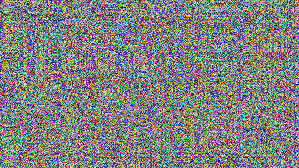

In [24]:
from PIL import Image
from random import randint
import numpy
import sys
from helper import *

im = Image.open('/content/Image-Cryptography/input/pic1.png')
pix = im.load()

#Obtaining the RGB matrices
r = []
g = []
b = []
for i in range(im.size[0]):
	r.append([])
	g.append([])
	b.append([]) 
	for j in range(im.size[1]):
		rgbPerPixel = pix[i,j]
		r[i].append(rgbPerPixel[0])
		g[i].append(rgbPerPixel[1])
		b[i].append(rgbPerPixel[2])

m = im.size[0]
n = im.size[1]

# Vectors Kr and Kc
alpha = 8
Kr = [randint(0,pow(2,alpha)-1) for i in range(m)]
Kc = [randint(0,pow(2,alpha)-1) for i in range(n)]
ITER_MAX = 1

print('Vector Kr : ', Kr)
print('Vector Kc : ', Kc)

f = open('keys.txt','w+')
f.write('Vector Kr : \n')
for a in Kr:
	f.write(str(a) + '\n')
f.write('Vector Kc : \n')
for a in Kc:
	f.write(str(a) + '\n')
f.write('ITER_MAX : \n')
f.write(str(ITER_MAX) + '\n')


for iterations in range(ITER_MAX):
	# For each row
	for i in range(m):
		rTotalSum = sum(r[i])
		gTotalSum = sum(g[i])
		bTotalSum = sum(b[i])
		rModulus = rTotalSum % 2
		gModulus = gTotalSum % 2
		bModulus = bTotalSum % 2
		if(rModulus==0):
			r[i] = numpy.roll(r[i],Kr[i])
		else:
			r[i] = numpy.roll(r[i],-Kr[i])
		if(gModulus==0):
			g[i] = numpy.roll(g[i],Kr[i])
		else:
			g[i] = numpy.roll(g[i],-Kr[i])
		if(bModulus==0):
			b[i] = numpy.roll(b[i],Kr[i])
		else:
			b[i] = numpy.roll(b[i],-Kr[i])
	# For each column
	for i in range(n):
		rTotalSum = 0
		gTotalSum = 0
		bTotalSum = 0
		for j in range(m):
			rTotalSum += r[j][i]
			gTotalSum += g[j][i]
			bTotalSum += b[j][i]
		rModulus = rTotalSum % 2
		gModulus = gTotalSum % 2
		bModulus = bTotalSum % 2
		if(rModulus==0):
			upshift(r,i,Kc[i])
		else:
			downshift(r,i,Kc[i])
		if(gModulus==0):
			upshift(g,i,Kc[i])
		else:
			downshift(g,i,Kc[i])
		if(bModulus==0):
			upshift(b,i,Kc[i])
		else:
			downshift(b,i,Kc[i])
	# For each row
	for i in range(m):
		for j in range(n):
			if(i%2==1):
				r[i][j] = r[i][j] ^ Kc[j]
				g[i][j] = g[i][j] ^ Kc[j]
				b[i][j] = b[i][j] ^ Kc[j]
			else:
				r[i][j] = r[i][j] ^ rotate180(Kc[j])
				g[i][j] = g[i][j] ^ rotate180(Kc[j])
				b[i][j] = b[i][j] ^ rotate180(Kc[j])
	# For each column
	for j in range(n):
		for i in range(m):
			if(j%2==0):
				r[i][j] = r[i][j] ^ Kr[i]
				g[i][j] = g[i][j] ^ Kr[i]
				b[i][j] = b[i][j] ^ Kr[i]
			else:
				r[i][j] = r[i][j] ^ rotate180(Kr[i])
				g[i][j] = g[i][j] ^ rotate180(Kr[i])
				b[i][j] = b[i][j] ^ rotate180(Kr[i])


for i in range(m):
	for j in range(n):
		pix[i,j] = (r[i][j],g[i][j],b[i][j])

#im.save('encrypted_images/pic1.png')
im




# **Decrypt**

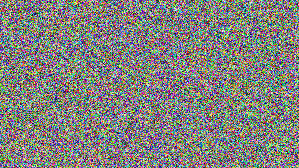

In [26]:
from PIL import Image
from random import randint
import numpy
import sys
from helper import *

im = Image.open('/content/Image-Cryptography/input/pic1.png')
pix = im.load()


#Obtaining the RGB matrices
r = []
g = []
b = []
for i in range(im.size[0]):
	r.append([])
	g.append([])
	b.append([]) 
	for j in range(im.size[1]):
		rgbPerPixel = pix[i,j]
		r[i].append(rgbPerPixel[0])
		g[i].append(rgbPerPixel[1])
		b[i].append(rgbPerPixel[2])

m = im.size[0]
n = im.size[1]

Kr =  [159, 181, 168, 22, 7, 85, 87, 41, 89, 148, 77, 208, 94, 254, 128, 3, 87, 149, 102, 18, 197, 210, 146, 94, 81, 62, 65, 137, 221, 133, 231, 196, 188, 217, 174, 55, 43, 221, 194, 118, 121, 66, 114, 167, 117, 156, 236, 129, 56, 119, 252, 141, 214, 196, 207, 223, 241, 78, 225, 219, 242, 228, 33, 35, 50, 33, 146, 207, 34, 79, 121, 223, 121, 55, 207, 120, 46, 182, 137, 123, 30, 129, 58, 210, 134, 47, 151, 63, 104, 199, 118, 241, 163, 195, 131, 144, 92, 253, 55, 70, 13, 213, 230, 72, 202, 38, 6, 83, 176, 214, 106, 90, 194, 65, 56, 101, 206, 130, 225, 161, 150, 223, 77, 131, 146, 208, 149, 203, 9, 34, 206, 137, 211, 231, 41, 230, 168, 23, 37, 211, 242, 28, 127, 98, 109, 102, 28, 216, 185, 241, 213, 3, 188, 154, 106, 98, 203, 189, 188, 246, 55, 55, 225, 194, 165, 1, 1, 189, 112, 153, 226, 195, 130, 44, 123, 131, 196, 135, 89, 248, 158, 200, 215, 155, 13, 186, 114, 57, 25, 10, 57, 141, 227, 241, 90, 117, 80, 59, 171, 46, 218, 185, 45, 39, 92, 129, 7, 214, 168, 161, 42, 8, 97, 86, 188, 136, 250, 25, 178, 218, 97, 152, 212, 192, 13, 206, 165, 161, 118, 115, 76, 181, 12, 226, 206, 213, 184, 22, 201, 66, 225, 167, 245, 64, 144, 25, 64, 40, 65, 206, 233, 121, 37, 188, 50, 122, 179, 10, 32, 247, 46, 85, 146, 48, 93, 160, 207, 2, 115, 226, 102, 60, 241, 227, 89, 91, 70, 254, 190, 62, 131, 20, 120, 12, 213, 63, 68, 229, 100, 185, 145, 198, 5, 124, 195, 6, 79, 26, 164]

Kc = [36, 60, 95, 2, 209, 218, 249, 112, 7, 111, 89, 104, 101, 218, 189, 117, 63, 227, 150, 143, 133, 11, 35, 225, 96, 141, 61, 173, 210, 54, 168, 192, 40, 193, 127, 26, 198, 186, 0, 238, 116, 149, 127, 76, 3, 55, 183, 27, 195, 50, 27, 99, 76, 195, 127, 186, 64, 218, 224, 127, 83, 221, 19, 130, 13, 54, 5, 40, 63, 154, 194, 177, 189, 57, 19, 200, 65, 72, 211, 38, 23, 163, 140, 135, 139, 83, 235, 223, 155, 236, 233, 183, 174, 8, 8, 83, 172, 164, 248, 132, 241, 58, 129, 212, 28, 70, 86, 210, 184, 42, 105, 242, 158, 3, 91, 87, 190, 111, 220, 178, 115, 246, 77, 126, 20, 217, 183, 88, 138, 209, 80, 21, 254, 32, 192, 220, 191, 6, 178, 221, 220, 20, 249, 220, 21, 72, 182, 238, 3, 62, 184, 146, 108, 171, 66, 106, 255, 155, 210, 228, 66, 8, 105, 145, 254, 252, 232, 174]

'''
print('Enter value of Kr')

for i in range(m):
	Kr.append(int(input()))

print('Enter value of Kc')
for i in range(n):
	Kc.append(int(input()))
'''

ITER_MAX = 1


for iterations in range(ITER_MAX):
	# For each column
	for j in range(n):
		for i in range(m):
			if(j%2==0):
				r[i][j] = r[i][j] ^ Kr[i]
				g[i][j] = g[i][j] ^ Kr[i]
				b[i][j] = b[i][j] ^ Kr[i]
			else:
				r[i][j] = r[i][j] ^ rotate180(Kr[i])
				g[i][j] = g[i][j] ^ rotate180(Kr[i])
				b[i][j] = b[i][j] ^ rotate180(Kr[i])
	# For each row
	for i in range(m):
		for j in range(n):
			if(i%2==1):
				r[i][j] = r[i][j] ^ Kc[j]
				g[i][j] = g[i][j] ^ Kc[j]
				b[i][j] = b[i][j] ^ Kc[j]
			else:
				r[i][j] = r[i][j] ^ rotate180(Kc[j])
				g[i][j] = g[i][j] ^ rotate180(Kc[j])
				b[i][j] = b[i][j] ^ rotate180(Kc[j])
	# For each column
	for i in range(n):
		rTotalSum = 0
		gTotalSum = 0
		bTotalSum = 0
		for j in range(m):
			rTotalSum += r[j][i]
			gTotalSum += g[j][i]
			bTotalSum += b[j][i]
		rModulus = rTotalSum % 2
		gModulus = gTotalSum % 2
		bModulus = bTotalSum % 2
		if(rModulus==0):
			downshift(r,i,Kc[i])
		else:
			upshift(r,i,Kc[i])
		if(gModulus==0):
			downshift(g,i,Kc[i])
		else:
			upshift(g,i,Kc[i])
		if(bModulus==0):
			downshift(b,i,Kc[i])
		else:
			upshift(b,i,Kc[i])

	# For each row
	for i in range(m):
		rTotalSum = sum(r[i])
		gTotalSum = sum(g[i])
		bTotalSum = sum(b[i])
		rModulus = rTotalSum % 2
		gModulus = gTotalSum % 2
		bModulus = bTotalSum % 2
		if(rModulus==0):
			r[i] = numpy.roll(r[i],-Kr[i])
		else:
			r[i] = numpy.roll(r[i],Kr[i])
		if(gModulus==0):
			g[i] = numpy.roll(g[i],-Kr[i])
		else:
			g[i] = numpy.roll(g[i],Kr[i])
		if(bModulus==0):
			b[i] = numpy.roll(b[i],-Kr[i])
		else:
			b[i] = numpy.roll(b[i],Kr[i])

for i in range(m):
	for j in range(n):
		pix[i,j] = (r[i][j],g[i][j],b[i][j])

#im.save('decrypted_images/' + sys.argv[1])
im


